In [1]:
# !pip install -U pip wheel
# !pip install -q -r /Users/ryan/github/lltk/requirements.txt
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'/Users/ryan/github/prosodic')
sys.path.insert(0,'/Users/ryan/github/lltk')
from llmdh import *
from prosodic import Word
prosodic.USE_CACHE=False
import plotnine as p9
from sqlitedict import SqliteDict
p9.options.figure_size=11,8
import lltk

In [2]:
from lltk.model.classifier import *

In [3]:
df=pd.read_pickle('data.figdf.allpoems.pkl')

In [6]:
fn='data.figdf.smpl.pkl'
# dfsmpl = df.groupby('model').sample(100)
# dfsmpl.to_pickle(fn)
dfsmpl=pd.read_pickle(fn)

In [8]:
# import google.generativeai as genai
# genai.configure(api_key=os.getenv("GEMINI_API_KEY"))

# result = genai.embed_content(
#     model="models/embedding-001",
#     content=list(dfsmpl.poem),
#     task_type="retrieval_document",
#     title="Embedding of list of strings")

# embeddings = pd.DataFrame(result['embedding'], index=dfsmpl.index)
# embeddings.to_pickle('data.figdf.embeddings.smpl.pkl')
embeddings = pd.read_pickle('data.figdf.embeddings.smpl.pkl')

In [9]:
dfembed = dfsmpl[['model']].join(embeddings)
dfembed['model']=dfembed.model.apply(lambda x: 'LLM' if not x.startswith('b.') else 'Human')
dfembed

,model,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,model2
45442,b. 1950-2000,0.000049,0.008060,-0.033201,-0.009305,0.017413,0.046614,-0.003991,0.007556,0.065763,0.032157,-0.033224,-0.003029,-0.014116,-0.019762,-0.003833,0.000558,0.022195,0.016962,-0.024311,-0.036888,-0.037084,-0.004220,-0.004119,-0.005375,0.008465,0.021848,-0.012507,-0.057041,-0.037752,-0.006665,-0.040547,0.029733,-0.079350,-0.017085,0.002873,-0.021841,0.023420,-0.018010,0.025329,0.038509,0.029536,-0.019405,-0.009667,-0.002905,0.001209,-0.015509,-0.014169,0.016052,0.001072,-0.053654,0.014832,-0.006244,0.045187,-0.015612,0.014264,-0.060090,0.054238,0.036726,-0.035624,0.027554,-0.029415,0.043779,-0.025208,0.059387,-0.000951,-0.056424,-0.028235,0.000497,0.056310,-0.010361,0.020067,-0.062294,0.027589,0.028379,-0.083579,-0.122369,-0.022710,0.007527,0.052784,0.013886,0.026596,-0.039017,-0.022471,-0.020690,-0.068767,-0.015652,-0.034030,0.015362,-0.017558,0.049029,-0.003813,-0.020083,0.063805,-0.059997,-0.008264,0.028876,-0.029418,0.012169,-0.014971,-0.012521,0.036326,0.024550,0.005946,-0.005351,0.017313,0.

In [18]:
model = Classifier(dfembed.reset_index().drop('index',1))

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [19]:
model.classify('model')

ValueError: cannot reindex on an axis with duplicate labels

In [13]:
# from sklearn.manifold import TSNE

# X=embeddings.values
# tsne = TSNE(n_components=2, random_state=42)

# # Apply t-SNE
# X_reduced = tsne.fit_transform(X)

# # Convert the t-SNE output to a DataFrame
# df_tsne = pd.DataFrame(X_reduced, columns=['TSNE1', 'TSNE2'], index=dfsmpl.index)
# df_tsne

In [ ]:
dfall=dfsmpl.join(df_tsne)
dfall['model2']=dfall.model.apply(lambda x: 'LLM' if not x.startswith('b.') else 'Human')

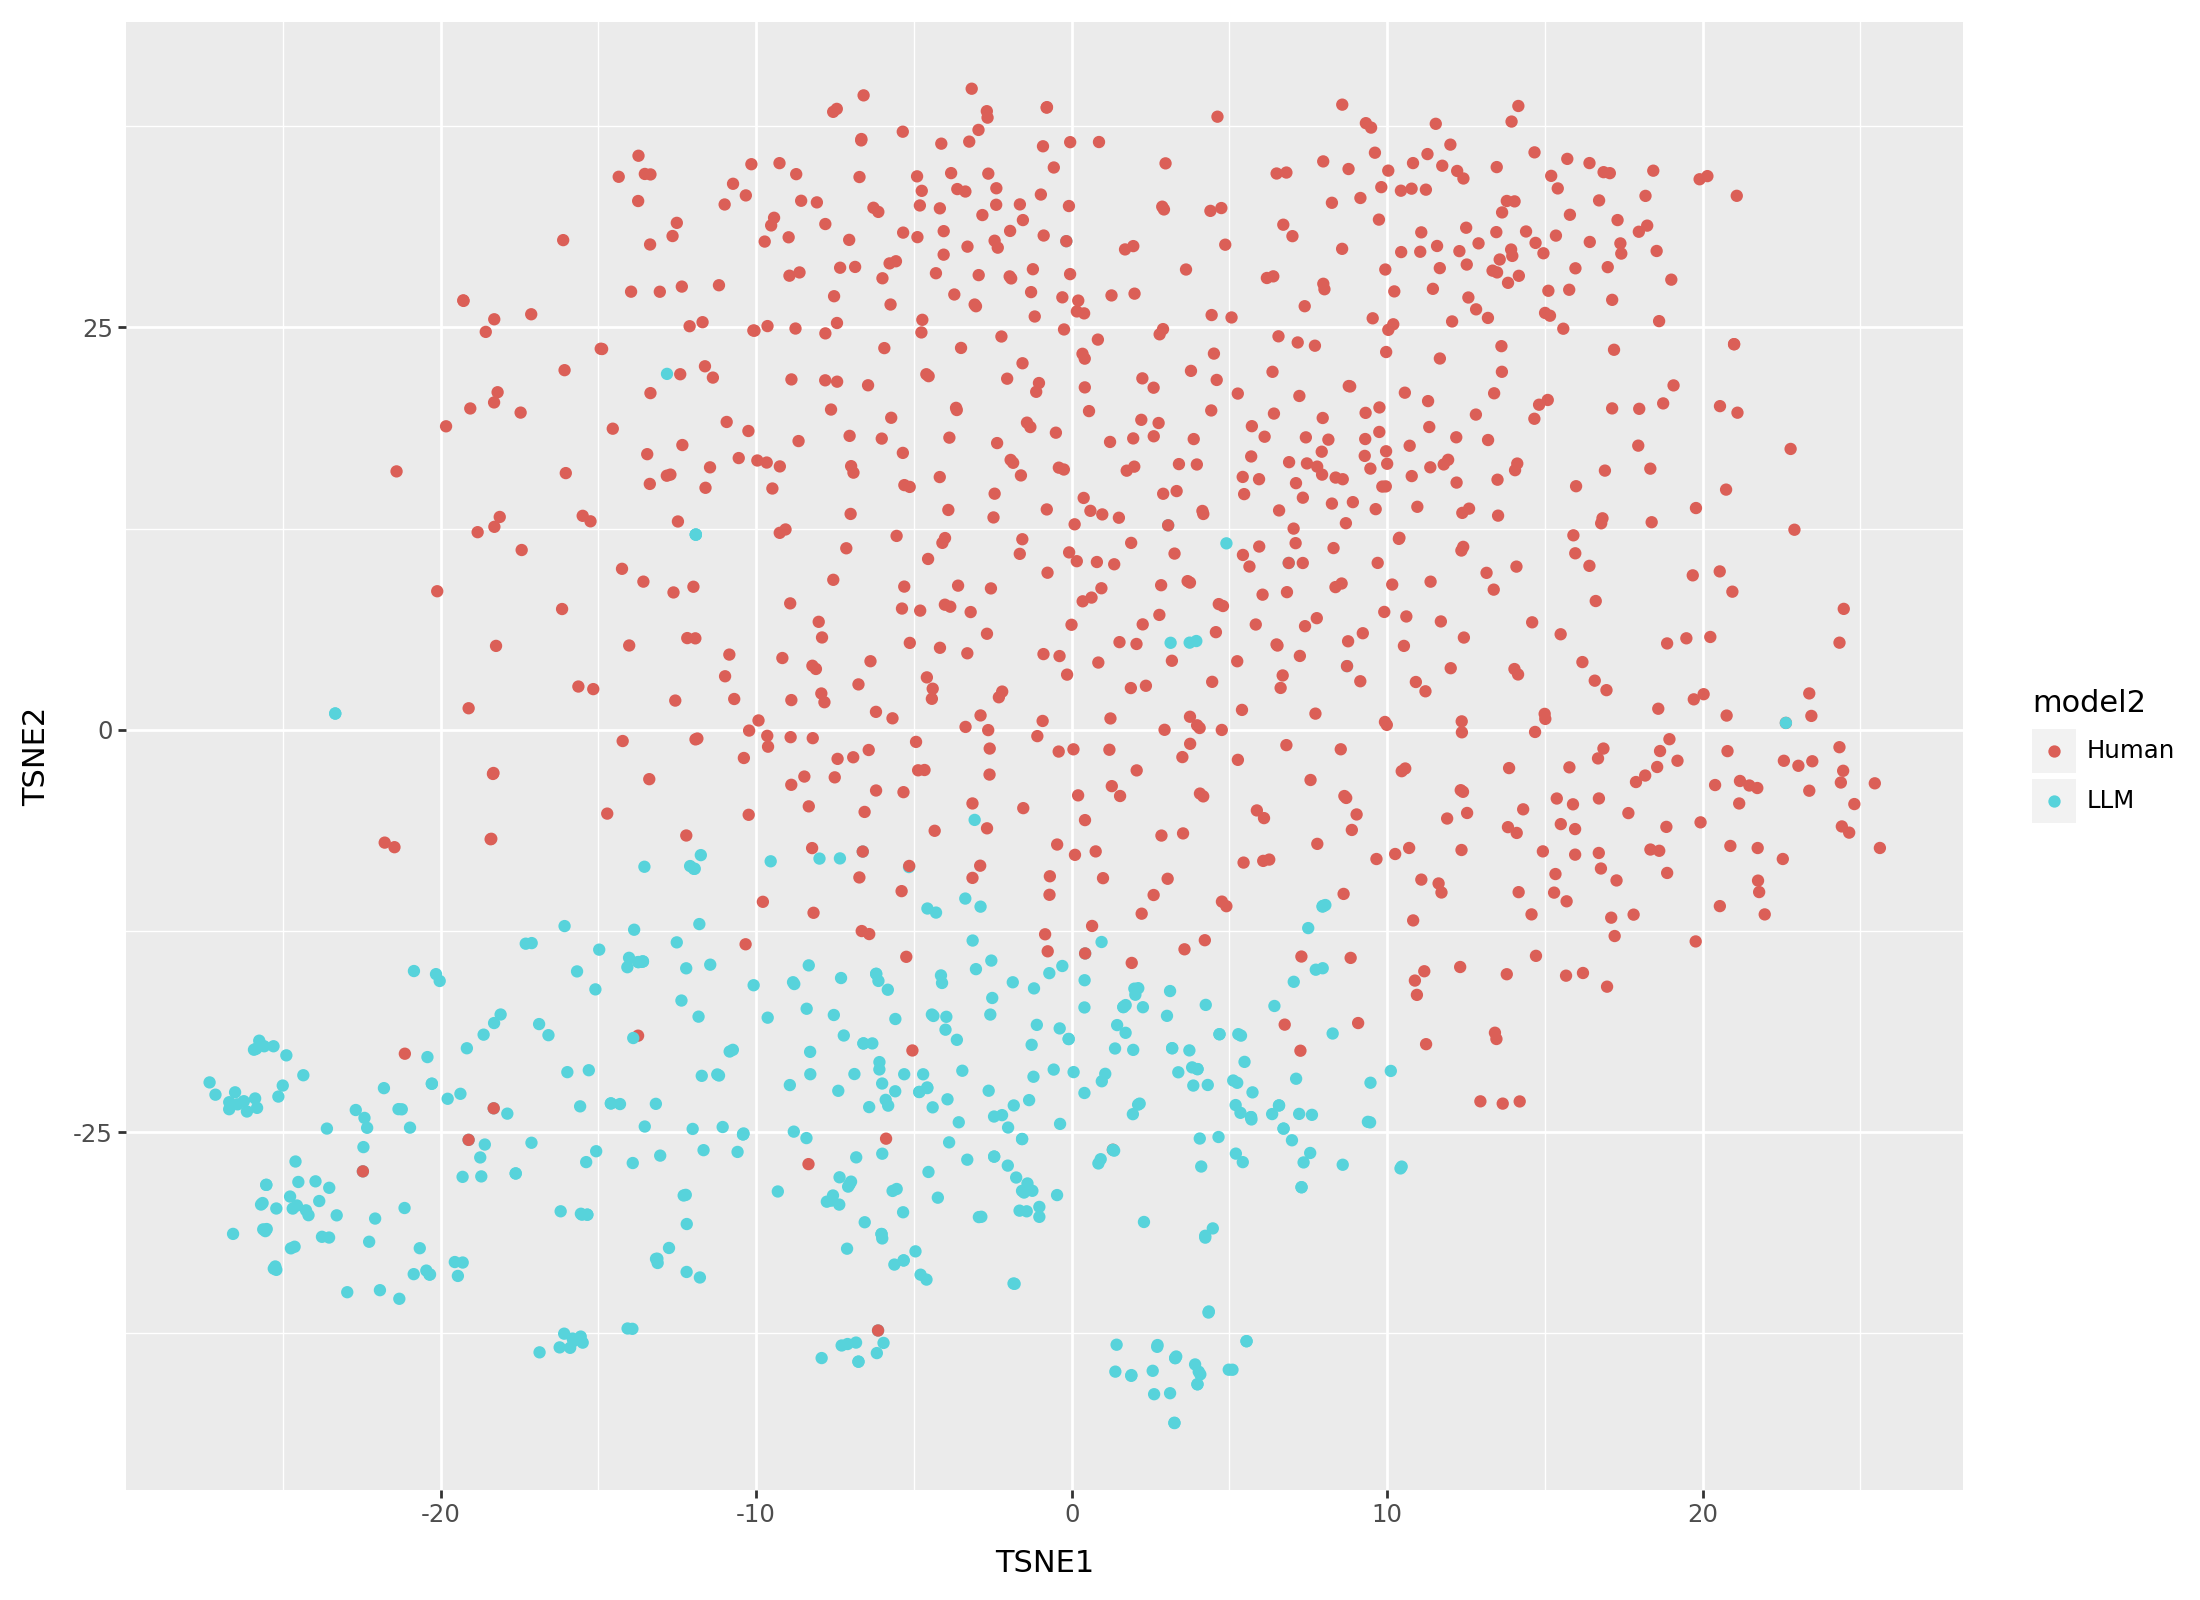

In [ ]:
import plotnine as p9
fig=p9.ggplot(dfall, p9.aes(x='TSNE1', y='TSNE2', color='model2'))
fig+=p9.geom_point()
fig

ImportError: cannot import name 'Model' from 'lltk.model.model' (/Users/ryan/github/lltk/lltk/model/model.py)

In [ ]:
Clas